In [70]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("monthly_milk_production.csv",index_col="Date",parse_dates=True)
len(df)

168

In [72]:
train = df.iloc[:156]
test = df.iloc[156:]

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [75]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator                          #type: ignore

In [76]:
batch = 1
input = 12
features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=input, batch_size=batch)

In [77]:
x,y = generator[0]
print(x,y)

[[[0.08653846]
  [0.01923077]
  [0.20913462]
  [0.24759615]
  [0.41826923]
  [0.34615385]
  [0.20913462]
  [0.11057692]
  [0.03605769]
  [0.05769231]
  [0.        ]
  [0.06971154]]] [[0.11298077]]


In [78]:
from tensorflow.keras.models import Sequential                                      #type: ignore
from tensorflow.keras.layers import LSTM                                             #type: ignore
from tensorflow.keras.layers import Dense                                            #type: ignore

In [79]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(input, features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=10)

Epoch 1/10


/home/nakul/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/nakul/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0724
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058
Epoch 9/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038
Epoch 10/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030


In [80]:
test_predictions = []

first_batch = scaled_train[-input:]
current_batch = first_batch.reshape(batch,input,features)

for i in range(len(test)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_prediction]],axis=1)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [81]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/tmp/ipykernel_860/4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

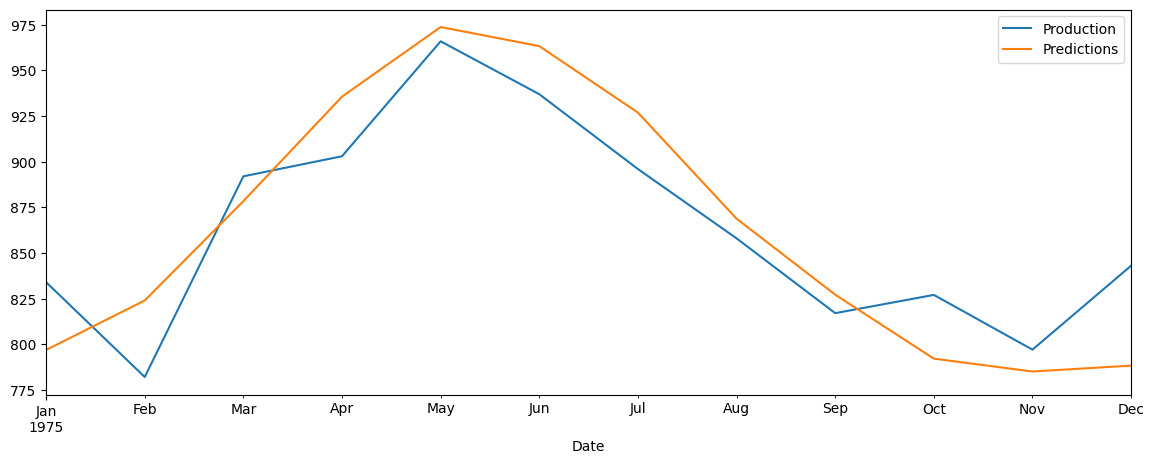

In [82]:
test.plot(figsize=(14,5))